# Objective:

- This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
- To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.


### 1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

### 2. Load the dataset and Check the first few samples, shape, info of the data and try to familiarize yourself with different features. 

In [2]:
# Load the dataset
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
# checking the Shape
df.shape

(614, 13)

In [4]:
# checking the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


- This output shows that we have around 614 entries with 13 columns
- We have 7 object data type, 5 Float data type and 1 Integer data type

In [5]:
# checking statistical summary
df.describe()

,dependents,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='O')

,loan_id,gender,married,education,self_employed,property_area,loan_status
count,614,601,611,614,582,614,614
unique,614,2,2,2,2,3,2
top,lp001002,male,yes,graduate,no,semiurban,y
freq,1,489,398,480,500,233,422


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [7]:
## Drop the redundent feature loan_id
df=df.drop(columns=['loan_id'],axis=1)

In [8]:
df.columns

Index(['gender', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [9]:
# Checking missing values
df.isnull().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [10]:
## Now filling "NAN" with the most frequent value- the mode.
for col in ['gender', 'married', 'self_employed', 'loan_amount_term','credit_history','dependents']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    
## Now filling "NAN" with meadian value
for col in ['dependents', 'loanamount']:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
df.isnull().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [12]:
categorical_features= df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

In [13]:
## Drop the Target Column
categorical_features=categorical_features.drop(columns=['loan_status'],axis=1)

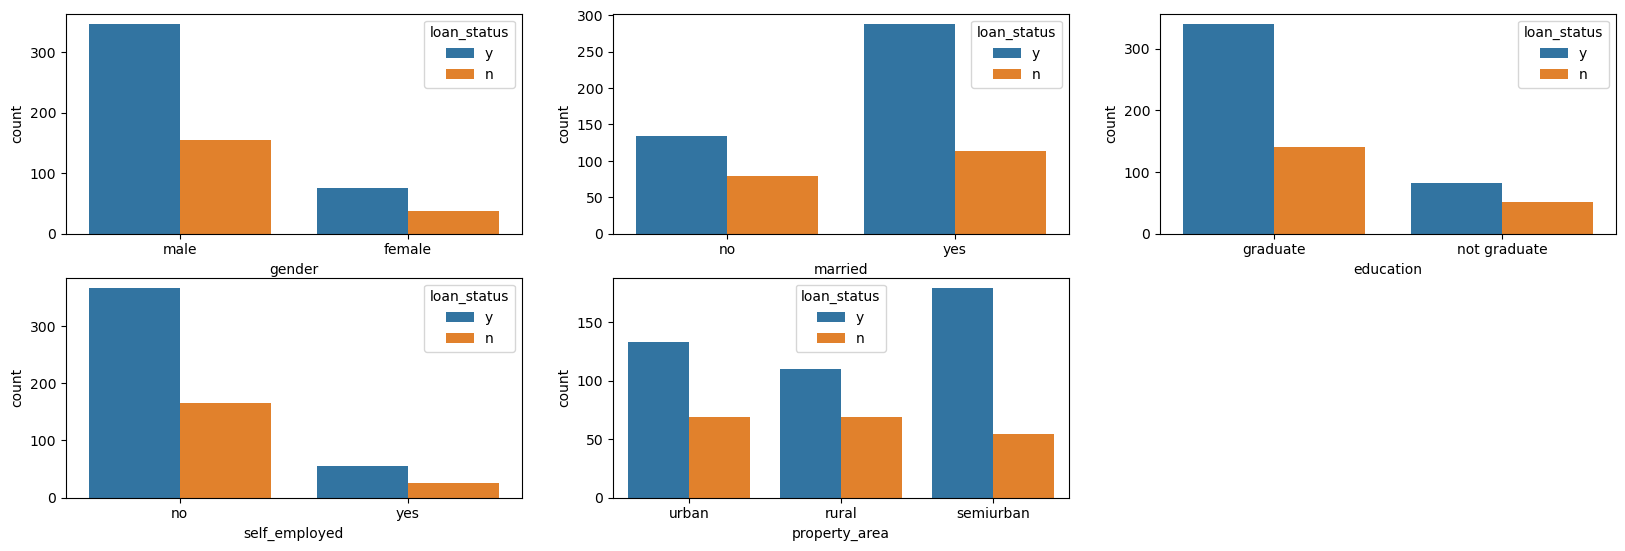

In [14]:
i=1
plt.figure(figsize=(20,20))
for feature in categorical_features:
    plt.subplot(6,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

- Majorly the male customers applied the loan than female customers and the loan approved to the male customers and the loan rejection ratio is lesser for female customers.
- The finance company approved the loan for married customer based on the eligilbility.
- Loan approval rate is higher for the graduates.
- Mostly the loan sanctioned for the private employees
- loan mostly approved to Semi-urban area customers than urban and rural areas customers. 

### 5. Encode the categorical data.

In [15]:
## Manual Encoding for the education feature
df['education'] = df['education'].replace({'not graduate':0, 'graduate':1})

In [16]:
df_cat = df.select_dtypes(include='object')
le = LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [17]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,2,1


- We observe that the Encoded dataset with original dataset, labels of the converted categorical column values are as follows:
    - Gender labels
        - Female : 0
        - Male : 1
    - Married Labels
        - No : 0
        - Yes : 1
    - Education labels
        - Not Graduate : 1
        - Graduate : 1
    - Self Employed Labels
        - No : 0
        - Yes : 1
    - Property Area Labels
        - rural : 0
        - semiurban : 1
        - Urban : 2
        
        

### 6. Separate the target and independent features and split the data into train and test. 

In [18]:
## Separate the target
X= df.drop('loan_status',axis=1)
y= df['loan_status']

In [19]:
## split the data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=100)
print('Shape of X_train:',X_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (429, 11)
Shape of X_test: (185, 11)
Shape of y_train: (429,)
Shape of y_test: (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. 

#### Checking Accuracy for the Classification Model

In [20]:
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    pred=model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [21]:
# Intializing the models
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=300, max_depth=3, random_state=100)
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators=[('rf',rf),('knn',knn), ('gb',gb), ('adb',adb)]
sc= StackingClassifier(estimators=estimators, final_estimator=rf)

In [22]:
result = pd.DataFrame(columns = ['Accuracy'])

for model,model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Decision Tree','Random Forest',
                            'Ada Boost', 'Gradient Boost', 'Stacking']):
    
    result.loc[model_name] = fit_n_predict(model,X_train,X_test,y_train,y_test)

In [23]:
result

,Accuracy
Logistic Regression,0.772973
Naive Bayes,0.740541
KNN,0.627027
Decision Tree,0.681081
Random Forest,0.778378
Ada Boost,0.772973
Gradient Boost,0.735135
Stacking,0.783784


- Based on the Accuracy of the models, the 4 highest amoung the model is Stacking, Random Forest, Logistic Regression & Ada Boost classifier and their accuracy around 77-78%.
- We can further go with evaluating the Stacking, Random Forest, Logistic Regression classifier based on the different performance metrics such as presicion, recall and F1score and choose the model accordingly.

In [24]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

#### Predict "Outcome" using Stacking Classifier  

In [25]:
y_train_pred_sc = sc.predict(X_train) 
y_test_pred_sc = sc.predict(X_test)


accuracy_train = accuracy_score(y_train,y_train_pred_sc)
accuracy_test = accuracy_score(y_test,y_test_pred_sc)

print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 0.8228438228438228
Accuracy test: 0.7837837837837838


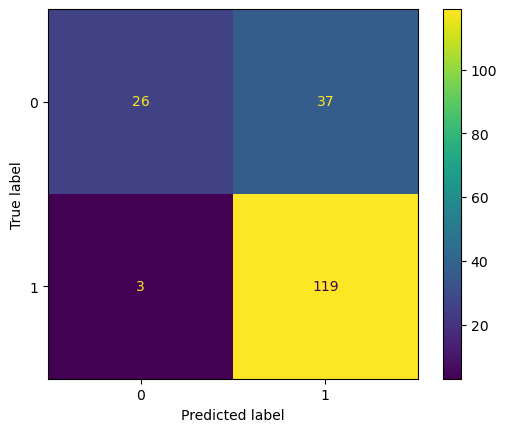

In [26]:
## Confusion matrix
plot_confusion_matrix(sc, X_test, y_test)
plt.show()

In [27]:
## Compute precision, recall and F1-score
print(classification_report(y_test, y_test_pred_sc))

              precision    recall  f1-score   support

           0       0.90      0.41      0.57        63
           1       0.76      0.98      0.86       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.78      0.76       185



#### Predict "Outcome" using Random Forest Classifier  

In [28]:
y_train_pred_rf = rf.predict(X_train) 
y_test_pred_rf = rf.predict(X_test)


accuracy_train = accuracy_score(y_train,y_train_pred_rf)
accuracy_test = accuracy_score(y_test,y_test_pred_rf)

print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 0.8228438228438228
Accuracy test: 0.7783783783783784


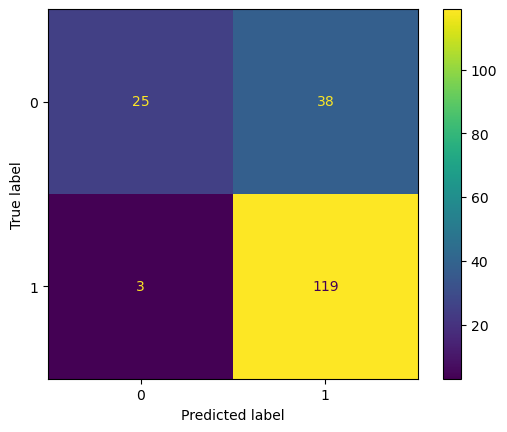

In [29]:
## Confusion matrix
plot_confusion_matrix(rf, X_test, y_test)
plt.show()

In [30]:
## Compute precision, recall and F1-score
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

    accuracy                           0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



#### Predict "Outcome" using Logistic Regression Classifier  

In [31]:
y_train_pred_lr = lr.predict(X_train) 
y_test_pred_lr = lr.predict(X_test)


accuracy_train = accuracy_score(y_train,y_train_pred_lr)
accuracy_test = accuracy_score(y_test,y_test_pred_lr)

print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 0.8275058275058275
Accuracy test: 0.772972972972973


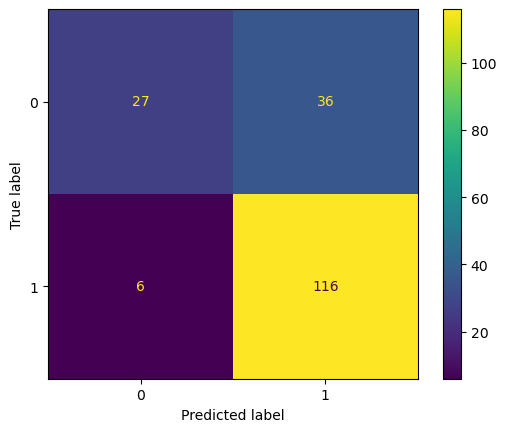

In [32]:
## Confusion matrix
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

In [33]:
## Compute precision, recall and F1-score
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.43      0.56        63
           1       0.76      0.95      0.85       122

    accuracy                           0.77       185
   macro avg       0.79      0.69      0.70       185
weighted avg       0.78      0.77      0.75       185



#### Saving Stacking Classifier model to disk

- Based on the evaluation of the Higher accuracy models,conclude that we build the Stacking Classifier Model for Prection of Loan Approval Eligibility.

In [34]:
#Saving model to disk
import pickle
pickle.dump(sc, open('model.pkl', 'wb'))